# Video Processing & Object Tracking

## 1. Background Subtraction Methods

Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

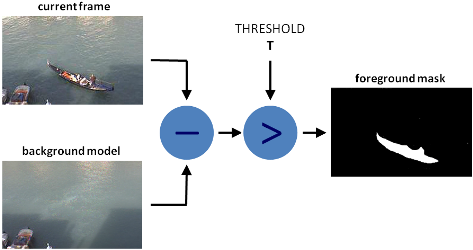

Background modeling consists of two main steps:

1. Background Initialization;
2. Background Update.
In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.

In [ ]:
import cv2

source=cv2.VideoCapture('Samples/bikes.mp4')
#source=cv2.VideoCapture(1)

backSub = cv2.createBackgroundSubtractorMOG2()

while(True):
    
    ret,img=source.read()
    fgMask = backSub.apply(img)
    
    cv2.imshow('LIVE',img)
    cv2.imshow('fgMask',fgMask)
    key=cv2.waitKey(10)

    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## 2. Mean Shift

The intuition behind the meanshift is simple. Consider you have a set of points. (It can be a pixel distribution like histogram backprojection). You are given a small window (may be a circle) and you have to move that window to the area of maximum pixel density (or maximum number of points). It is illustrated in the simple image given below:
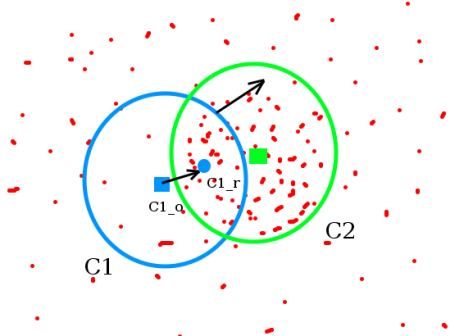
The initial window is shown in blue circle with the name "C1". Its original center is marked in blue rectangle, named "C1_o". But if you find the centroid of the points inside that window, you will get the point "C1_r" (marked in small blue circle) which is the real centroid of the window. Surely they don't match. So move your window such that the circle of the new window matches with the previous centroid. Again find the new centroid. Most probably, it won't match. So move it again, and continue the iterations such that the center of window and its centroid falls on the same location (or within a small desired error). So finally what you obtain is a window with maximum pixel distribution. It is marked with a green circle, named "C2". As you can see in the image, it has maximum number of points.

So we normally pass the histogram backprojected image and initial target location. When the object moves, obviously the movement is reflected in the histogram backprojected image. As a result, the meanshift algorithm moves our window to the new location with maximum density.

In [ ]:
import cv2

#source=cv2.VideoCapture('Samples/bikes.mp4')
source=cv2.VideoCapture(1)

x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)

roi = img[y:y+h, x:x+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_roi, np.array((1,136,63)), np.array((10,255,255)))
#Red = (1,136,63), (10,255,255)

roi_hist = cv2.calcHist([hsv_roi],[0],mask,[256],[0,256])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(True):
    
    ret,img=source.read()
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,256],1)
    # apply meanshift to get the new location
    ret, track_window = cv2.meanShift(dst, track_window, term_crit)
    # Draw it on image
    x,y,w,h = track_window
    img2 = cv2.rectangle(img, (x,y), (x+w,y+h), 255,2)
    
    cv2.imshow('LIVE',img)
    cv2.imshow('dst',dst)
    cv2.imshow('mask',mask)
    key=cv2.waitKey(10)

    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

# Object Detection using Haarcascade Classifiers

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

[read more @ OpenCV official documentation](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

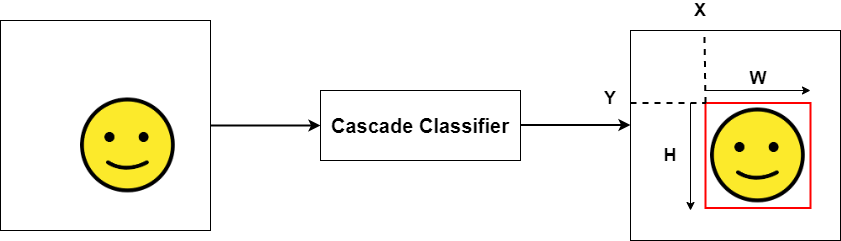

### Haar Like Features

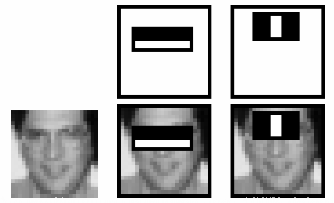

### Face Detection using Python and OpenCV

In [ ]:
import cv2

img=cv2.imread('samples/face.jpg')

face_clsfr=cv2.CascadeClassifier('Cascades\Face & Eyes\haarcascade_frontalface_default.xml')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_clsfr.detectMultiScale(gray,1.3,5)

for face in faces:
    
    x=face[0]
    y=face[1]
    w=face[2]
    h=face[3]
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow('IMG',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ```faces=face_clsfr.detectMultiScale(gray,1.3,5)```

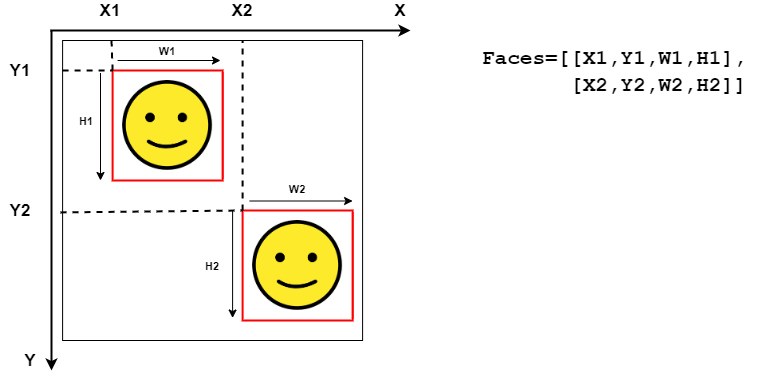

## Drawing Rectangles using ```cv2.rectangle()```

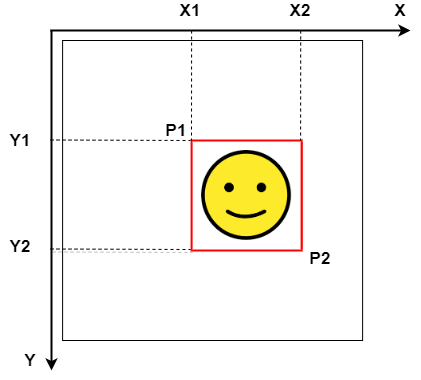

In [ ]:
import cv2

face_clsfr=cv2.CascadeClassifier('Cascades\Face & Eyes\haarcascade_frontalface_default.xml')

source=cv2.VideoCapture('samples/facevideo.mp4')

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)     #results=clsfr.predict(features)

    for face in faces:
        
        x=face[0]
        y=face[1]
        w=face[2]
        h=face[3]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(img,'FACE',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
                                   
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [ ]:
import cv2

face_clsfr=cv2.CascadeClassifier('Cascades\Face & Eyes\haarcascade_frontalface_default.xml')
eye_clsfr=cv2.CascadeClassifier('Cascades\Face & Eyes\haarcascade_eye_tree_eyeglasses.xml')

source=cv2.VideoCapture('samples/facevideo.mp4')

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)     #results=clsfr.predict(features)

    for face in faces:
        
        x=face[0]
        y=face[1]
        w=face[2]
        h=face[3]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(img,'FACE',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)

        face_img=gray[y:y+w,x:x+w]

        eyes=eye_clsfr.detectMultiScale(face_img)

        for(ex,ey,ew,eh) in eyes:

            cv2.rectangle(img,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(255,0,0),2)
            cv2.putText(img,'EYES',(x+ex,y+ey-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2)

            
            
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## External Links & Credits

1. Cascade Classifiers [Source](https://github.com/opencv/opencv)
2. OpenCV drawing [functions](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html)
3. OpenCV [color spaces](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html)
3. Read more about```detectMultiScale()``` [function](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498)

## Example : Detecting Motor Bikes using Cascade Classifiers

In [ ]:
import cv2

bikes_classifier=cv2.CascadeClassifier('Cascades/Vehicle and pedestrain detection/two_wheeler.xml')

camera=cv2.VideoCapture('bikes.mp4')

while(True):

    ret,img=camera.read()
    
    blur=cv2.blur(img,(3,3))
    gray=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
    
    bikes=bikes_classifier.detectMultiScale(gray)
    
    for (x,y,w,h) in bikes:

        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(img,'Bike',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if key==27:
        break

cv2.destroyAllWindows()
camera.release()

### Counting the no. of Motor Bikes passing yellow line

In [ ]:
import cv2

bikes_classifier=cv2.CascadeClassifier('Cascades/Vehicle and pedestrain detection/two_wheeler.xml')

camera=cv2.VideoCapture('bikes.mp4')

count=0

while(True):

    ret,img=camera.read()
    
    height,width=img.shape[0:2]
    
    img[0:70,0:width]=[0,0,255]
    cv2.putText(img,'MOTOR BIKE COUNT:',(10,50),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2)
    
    cv2.line(img,(0,height-200),(width,height-200),(0,255,255),2)
    
    blur=cv2.blur(img,(3,3))
    gray=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
    
    bikes=bikes_classifier.detectMultiScale(gray)
    
    for (x,y,w,h) in bikes:
        
        bikeCy=int(y+h/2)
        linCy=height-200
        
        if(bikeCy<linCy+6 and bikeCy>linCy-6):
            
            count=count+1
            cv2.line(img,(0,height-200),(width,height-200),(0,0,255),5)
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(img,'Bike',(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
        cv2.putText(img,str(count),(500,50),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2)
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if key==27:
        break

cv2.destroyAllWindows()
camera.release()

## ```img.shape()```
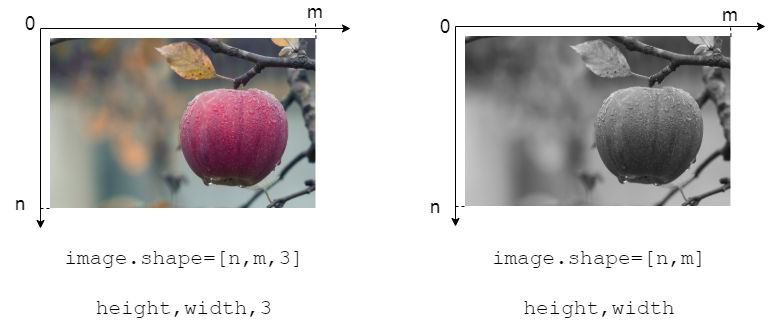

## ```img[0:70,0:width]=[0,0,255], cv2.line(......) and cv2.putText(......)```
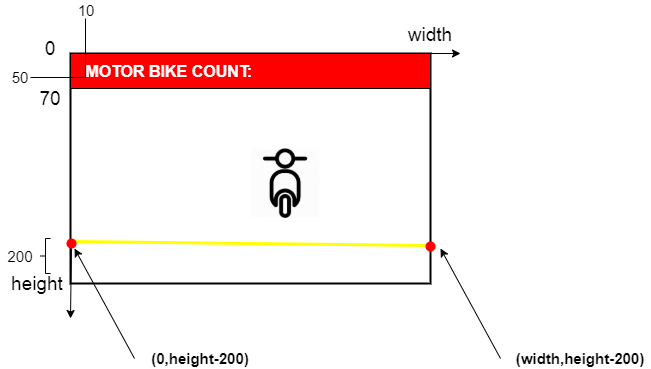

### Bike Center and Counting
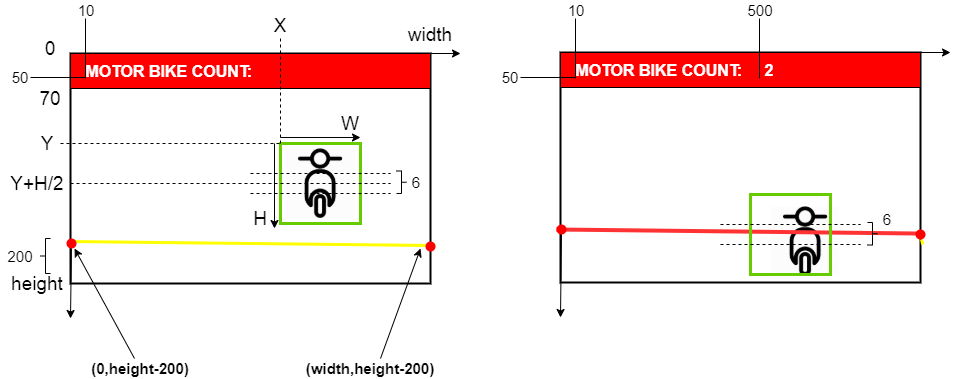

# Stereo Vision

Stereovision techniques use two cameras to see the same object. The two cameras are separated by a baseline, the distance for which is assumed to be known accurately. The two cameras simultaneously capture two images. The two images are analyzed to note the differences between the images. Essentially, one needs to accurately identify the same pixel in both images, known as the problem of correspondence between the two cameras. Features like corners can be easily found in one image, and the same can be searched in the other image. Alternatively, the disparity between the images can be found to get the indicative regions in the other image, corresponding to the same regions in the first image, for which a small search can be used. The disparity helps to get the depth of the point which enables projecting it in a 3D world used for navigation.

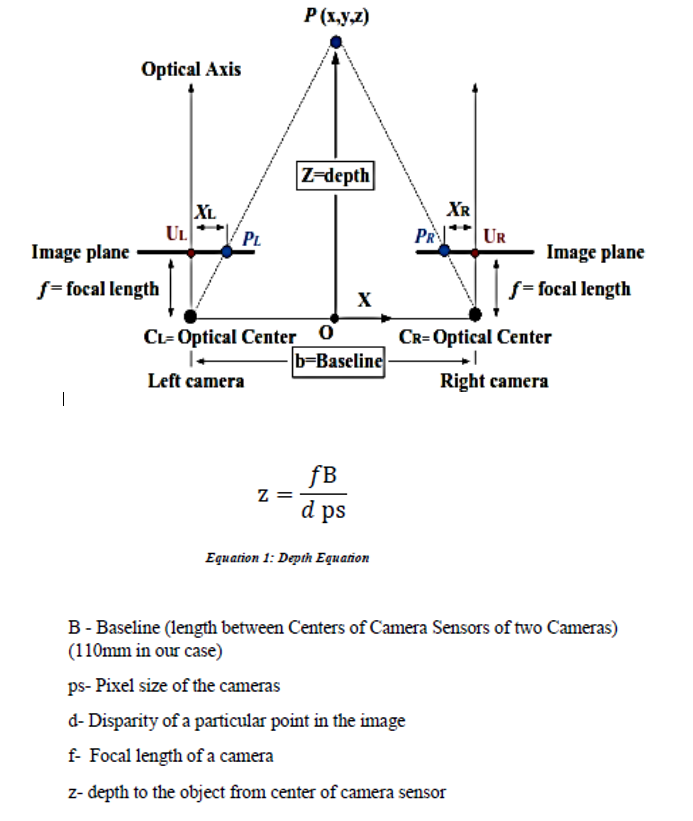

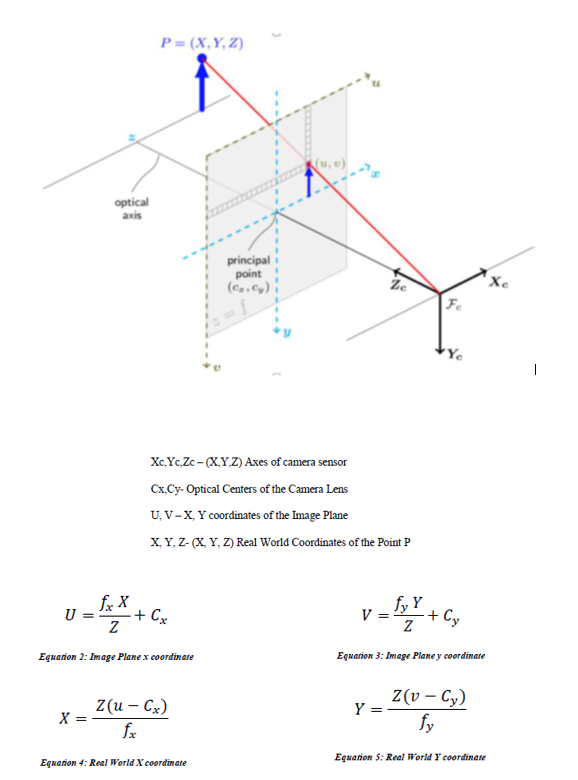

# Stereo Vision Cameras

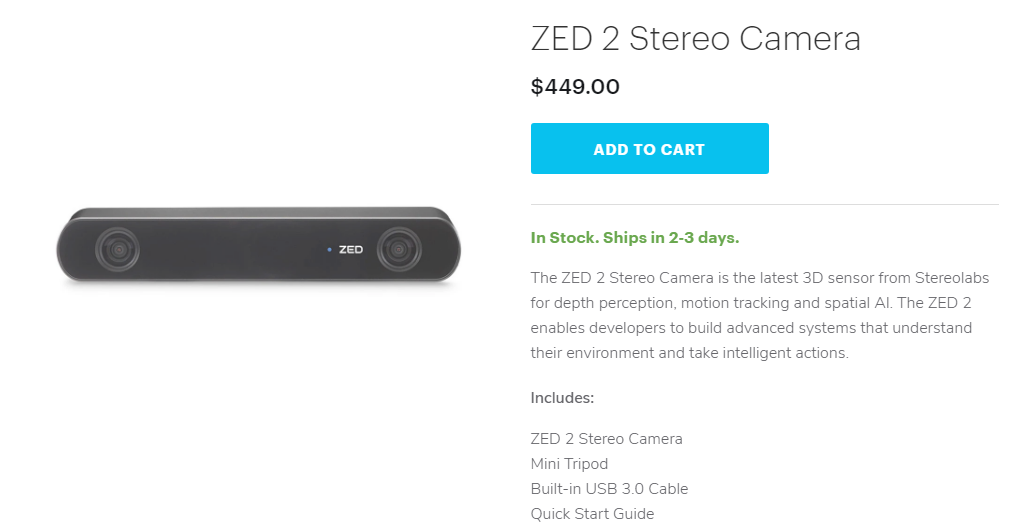

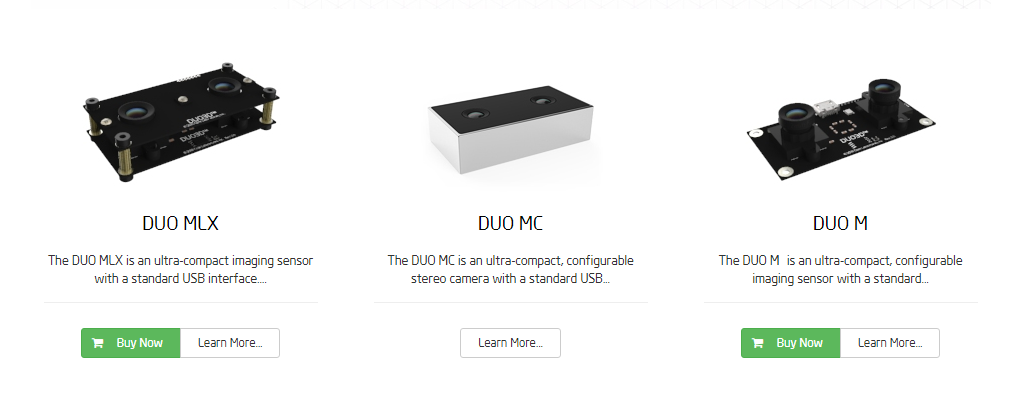

# Camera balancing

In [ ]:
import numpy as np
import cv2

captureL=cv2.VideoCapture(1)
captureR=cv2.VideoCapture(2)

def lines(img):

    h,w=img.shape[:2]

    for i in range(0,h,20):

        cv2.line(img,(0,i),(w,i),(0,255,0),1)

while(True):

    ret,imgL = captureL.read()
    ret,imgR = captureR.read()
    
    lines(imgL)
    lines(imgR)
    
    cv2.imshow('imgL',imgL)
    cv2.imshow('imgR',imgR)
    key=cv2.waitKey(10)
    
    if(key==27):
        break
cv2.destroyAllWindows()

# Distance Detection

In [ ]:
import cv2

fxR=823.98175049
fyR=818.34320068
cxR=297.0671601 
cyR=215.63753475

fxL=802.47924805
fyL=802.65380859
cxL=331.67814387
cyL=237.88057137

ps=0.0028
focal_length=fyR*ps
baseLine=110

face_clsfr=cv2.CascadeClassifier('Cascades/Face & Eyes/haarcascade_frontalface_default.xml')

captureL=cv2.VideoCapture(1)
captureR=cv2.VideoCapture(2)

faceL=0
faceR=0

faceL_mid=[]
faceR_mid=[]

#cv2.imshow('bike',bike_img)

count=0

while(True):

    ret,imgL=captureL.read()
    ret,imgR=captureR.read()

    #(height,width)=img.shape[:2]
    #img=cv2.resize(img,(int(width/2),int(height/2)))
    (heightL,widthL)=imgL.shape[:2]
    (heightR,widthR)=imgR.shape[:2]


    blurL=cv2.blur(imgL,(3,3))
    blurR=cv2.blur(imgR,(3,3))

    grayL=cv2.cvtColor(blurL,cv2.COLOR_BGR2GRAY)
    grayR=cv2.cvtColor(blurR,cv2.COLOR_BGR2GRAY)

    faceL=face_clsfr.detectMultiScale(grayL,1.3,5)
    faceR=face_clsfr.detectMultiScale(grayR,1.3,5)


    for (x,y,w,h) in faceL:

        faceL=1

        faceLx=x
        faceLy=y

        faceL_mid=[int(x+(w/2.0)),int(y+(h/2.0))]

        cv2.rectangle(imgL,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imgL,(x-1,y-40),(x+w+1,y),(0,255,0),-1)
        cv2.putText(imgL,'CAR',(x+4,y-15),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),3)
        cv2.circle(imgL,tuple(faceL_mid),5,(0,0,255),-1)


    for (x,y,w,h) in faceR:

        faceR=1

        faceRx=x
        faceRy=y

        faceR_mid=[int(x+(w/2.0)),int(y+(h/2.0))]

        cv2.rectangle(imgR,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imgR,(x-1,y-40),(x+w+1,y),(0,255,0),-1)
        cv2.putText(imgR,'CAR',(x+4,y-15),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),3)
        cv2.circle(imgR,tuple(faceR_mid),5,(0,0,255),-1)

    if(faceL==1 and faceR==1):

        disp=abs(faceR_mid[0]-faceL_mid[0])
        depth=(focal_length*float(baseLine))/(float(disp)*ps)
        cv2.putText(imgL,str(round(depth-100,2))+'mm',(faceLx+150,faceLy-15),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),3)
        cv2.putText(imgR,str(round(depth-100,2))+'mm',(faceRx+150,faceRy-15),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),3)

    cv2.imshow('LIVE_L',imgL)
    cv2.imshow('LIVE_R',imgR)
    key=cv2.waitKey(1)

    faceL,faceR=0,0
    
    if(key==27):
        break
cv2.destroyAllWindows()

# Camera Calibration

Today’s cheap pinhole cameras introduces a lot of distortion to images. Two major distortions are radial distortion and tangential distortion.

Due to radial distortion, straight lines will appear curved. Its effect is more as we move away from the center of image. For example, one image is shown below, where two edges of a chess board are marked with red lines. But you can see that border is not a straight line and doesn’t match with the red line. All the expected straight lines are bulged out. 

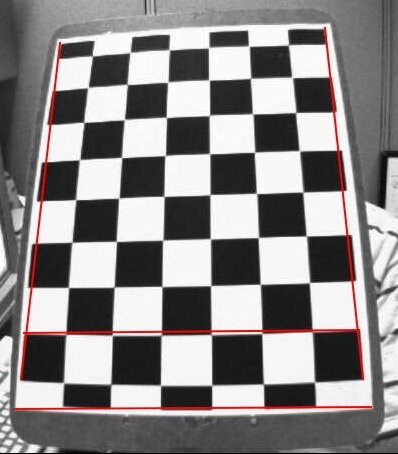

This distortion is solved as follows:
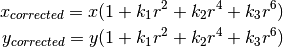

Similarly, another distortion is the tangential distortion which occurs because image taking lense is not aligned perfectly parallel to the imaging plane. So some areas in image may look nearer than expected. It is solved as below:

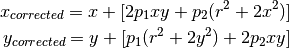

In addition to this, we need to find a few more information, like intrinsic and extrinsic parameters of a camera. Intrinsic parameters are specific to a camera. It includes information like focal length (f_x,f_y), optical centers (c_x, c_y) etc. It is also called camera matrix. It depends on the camera only, so once calculated, it can be stored for future purposes. It is expressed as a 3x3 matrix:

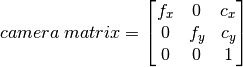

Extrinsic parameters corresponds to rotation and translation vectors which translates a coordinates of a 3D point to a coordinate system.

For stereo applications, these distortions need to be corrected first. To find all these parameters, what we have to do is to provide some sample images of a well defined pattern (eg, chess board). We find some specific points in it ( square corners in chess board). We know its coordinates in real world space and we know its coordinates in image. With these data, some mathematical problem is solved in background to get the distortion coefficients. That is the summary of the whole story. For better results, we need atleast 10 test patterns.

## Camera Calibration - Taking Sample Images

In [ ]:
import numpy as np
import cv2

print('Starting the Calibration just press the space bar to exit this part of the Programm\n')
print('Push (s) to save the image you want and push (c) to see next frame without saving the image')

i=0
C= False

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all images
objpoints= []   # 3d points in real world space
imgpoints= []  # 2d points in image plane


# Call the two cameras
capture= cv2.VideoCapture(1)   # Wenn 0 then Right Cam and wenn 2 Left Cam


while True:
    flag, img = capture.read()
    ##img = cv.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    blur=cv2.GaussianBlur(gray,(5,5),0)#blur the grayscale image
    ret,gray = cv2.threshold(blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#
    
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    cv2.imshow('frame',img)

    # If found, add object points, image points (after refining them)
    if (True == ret) and (False == C):

        objpoints.append(objp)
        corners2= cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)    # Refining the Position
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img,(7,6),corners2,ret)
        cv2.imshow('pattern_true',img)

        if cv2.waitKey(0) & 0xFF == ord('s'):   # Push "s" to save the images and "c" if u want to not save the images
            t= str(i)
            print('Saved'+t)
            cv2.imwrite('data/chessboard-R'+t+'.png',gray) # Save the image in the file where this Programm is located
            i=i+1
        else:
            print('canceled')

    # End the Programme
    if cv2.waitKey(1) & 0xFF == ord(' '):   # Push the space bar and maintan to exit this Programm
        break

# Release the Cameras
capture.release()
cv2.destroyAllWindows()    

## Camera Calibration

In [ ]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
import pylab as pl

win_size = 5
min_disp = -1
max_disp = 63 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16
#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
 numDisparities = num_disp,
 blockSize = 5,
 uniquenessRatio = 5,
 speckleWindowSize = 5,
 speckleRange = 5,
 disp12MaxDiff = 1,
 P1 = 8*3*win_size**2,#8*3*win_size**2,
 P2 =32*3*win_size**2) #32*3*win_size**2)

##########################################calibrating code##########################################

dFile = open('calibration-data/calibrated_data.txt', 'w')

# Termination criteria
criteria =(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points
objp = np.zeros((7*6,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all images
objpoints= []   # 3d points in real world space
imgpointsR= []   # 2d points in image plane
imgpointsL= []

# Start calibration from the camera
print('Starting calibration for the 2 cameras... ')
# Call all saved images
for i in range(0,31):   # Put the amount of pictures you have taken for the calibration inbetween range(0,?) wenn starting from the image number 0
    t= str(i)
    ChessImaR= cv2.imread('calibration-data/data/chessboard-R'+t+'.png',0)    # Right side
    ChessImaL= cv2.imread('calibration-data/data/chessboard-L'+t+'.png',0)    # Left side
    retR, cornersR = cv2.findChessboardCorners(ChessImaR,
                                               (7,6),None)  # Define the number of chees corners we are looking for
    retL, cornersL = cv2.findChessboardCorners(ChessImaL,
                                               (7,6),None)  # Left side
    if (True == retR) & (True == retL):
        objpoints.append(objp)
        cv2.cornerSubPix(ChessImaR,cornersR,(11,11),(-1,-1),criteria)
        cv2.cornerSubPix(ChessImaL,cornersL,(11,11),(-1,-1),criteria)
        imgpointsR.append(cornersR)
        imgpointsL.append(cornersL)


# Determine the new values for different parameters
#   Right Side

retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints,imgpointsR,ChessImaR.shape[::-1],None,None)
hR,wR= ChessImaR.shape[:2]
OmtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))
##
##   Left Side
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints,imgpointsL,ChessImaL.shape[::-1],None,None)
hL,wL= ChessImaL.shape[:2]
OmtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

print('Calibration done!!')

dFile.write(str((OmtxR, roiR)))
dFile.write('\n')
dFile.write(str((OmtxL, roiL)))
dFile.write('\n')

dFile.close()

np.save('calibration-data/mtxL',mtxL)
np.save('calibration-data/distL',distL)
np.save('calibration-data/OmtxL',OmtxL)
np.save('calibration-data/roiL',roiL)

np.save('calibration-data/mtxR',mtxR)
np.save('calibration-data/distR',distR)
np.save('calibration-data/OmtxR',OmtxR)
np.save('calibration-data/roiR',roiR)

print('Calibration data saved to calibration_data.txt')

##########################################calibrating code##########################################

## Using Calibrated Cameras

In [5]:
import cv2
import numpy as np

mtxL=np.load('calibration-data/mtxL.npy')
distL=np.load('calibration-data/distL.npy')
OmtxL=np.load('calibration-data/OmtxL.npy')
roiL=np.load('calibration-data/roiL.npy')

mtxR=np.load('calibration-data/mtxR.npy')
distR=np.load('calibration-data/distR.npy')
OmtxR=np.load('calibration-data/OmtxR.npy')
roiR=np.load('calibration-data/roiR.npy')


camL=cv2.VideoCapture(1)
camR=cv2.VideoCapture(2)


def lines(img):

    h,w=img.shape[:2]

    for i in range(0,h,20):

        cv2.line(img,(0,i),(w,i),(0,255,0),1)

img = None

while(1):

    ret,frameL=camL.read()
    ret,frameR=camR.read()

############ removing stereo errors

    w,h=frameL.shape[:2]
    Left_Stereo_Map= cv2.initUndistortRectifyMap(mtxL,distL,None,OmtxL,(w,h),5)   
    frame_niceL= cv2.remap(frameL,Left_Stereo_Map[0],Left_Stereo_Map[1], cv2.INTER_LINEAR,0)  
    x,y,w,h=roiL
    frame_niceL=frame_niceL[y:y+h,x:x+w]

    w,h=frameR.shape[:2]
    Right_Stereo_Map= cv2.initUndistortRectifyMap(mtxR,distR,None,OmtxR,(w,h),5)
    frame_niceR= cv2.remap(frameR,Right_Stereo_Map[0],Right_Stereo_Map[1], cv2.INTER_LINEAR,0)
    x,y,w,h=roiR
    frame_niceR=frame_niceR[y:y+h,x:x+w]
############
    grayL=cv2.cvtColor(frame_niceL,cv2.COLOR_BGR2GRAY)
    grayR=cv2.cvtColor(frame_niceR,cv2.COLOR_BGR2GRAY)

    lines(frame_niceL)
    lines(frame_niceR)

    cv2.imshow('CAML',frame_niceL)
    cv2.imshow('CAMR',frame_niceR)

    key=cv2.waitKey(1)
    
    if(key==27):
        break
cv2.destroyAllWindows()